In [1]:
%matplotlib notebook

In [2]:
## list of sports for both men and women:
#Athletics, Gymnastics, Alpine Skiing, Cross Country Skiing, Rowing, Sailing, Shooting, Swimming, Wrestling
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [3]:
# The path to our CSV file
file = "Resources/original_olympic_data.csv"

# Read our data into pandas
df = pd.read_csv(file)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
#Viewing the columns
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [5]:
#Selecting the columns
starter_olympics_df = df.loc[:, ['Name', 'Sex', 'Age', 'Team', 'NOC',
                                'Year', 'Sport', 'Event', 'Medal']]
starter_olympics_df.head()

#Select only USA participants
usa_filter = starter_olympics_df[(starter_olympics_df["NOC"] == "USA")]
usa_filter.head()

#drop duplicates based off of the name
usa_clean = usa_filter.drop_duplicates(subset=['Name'])
usa_clean.head()

#Checking for any Nan values on columns to be used
#usa_clean['NOC'].isnull().values.any()

,Name,Sex,Age,Team,NOC,Year,Sport,Event,Medal
10,Per Knut Aaland,M,31.0,United States,USA,1992,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
18,John Aalberg,M,31.0,United States,USA,1992,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
186,Stephen Anthony Abas,M,26.0,United States,USA,2004,Wrestling,"Wrestling Men's Featherweight, Freestyle",Silver
273,"David ""Dave"" Abbott",M,26.0,United States,USA,1928,Athletics,"Athletics Men's 5,000 metres",NaN
276,Jeremy Abbott,M,24.0,United States,USA,2010,Figure Skating,Figure Skating Men's Singles,NaN


In [6]:
#Creating seperate data frames for men and women to then plot on line plot
usa_women = usa_clean[(usa_clean['Sex'] == "F")]
usa_women_counts = usa_women.groupby(['Year'])['Sex'].apply(lambda x: x[x.str.contains('F')].count())
usa_women_counts_df = pd.DataFrame(data=usa_women_counts)
final_women_counts = usa_women_counts_df.reset_index()
final_women_counts.head()


usa_men = usa_clean[(usa_clean['Sex'] == "M")]
usa_men_counts = usa_men.groupby(['Year'])['Sex'].apply(lambda x: x[x.str.contains('M')].count())
usa_men_counts_df = pd.DataFrame(data=usa_men_counts)
final_men_counts = usa_men_counts_df.reset_index()
final_men_counts.head()



,Year,Sex
0,1896,14
1,1900,66
2,1904,508
3,1906,20
4,1908,98


<IPython.core.display.Javascript object>


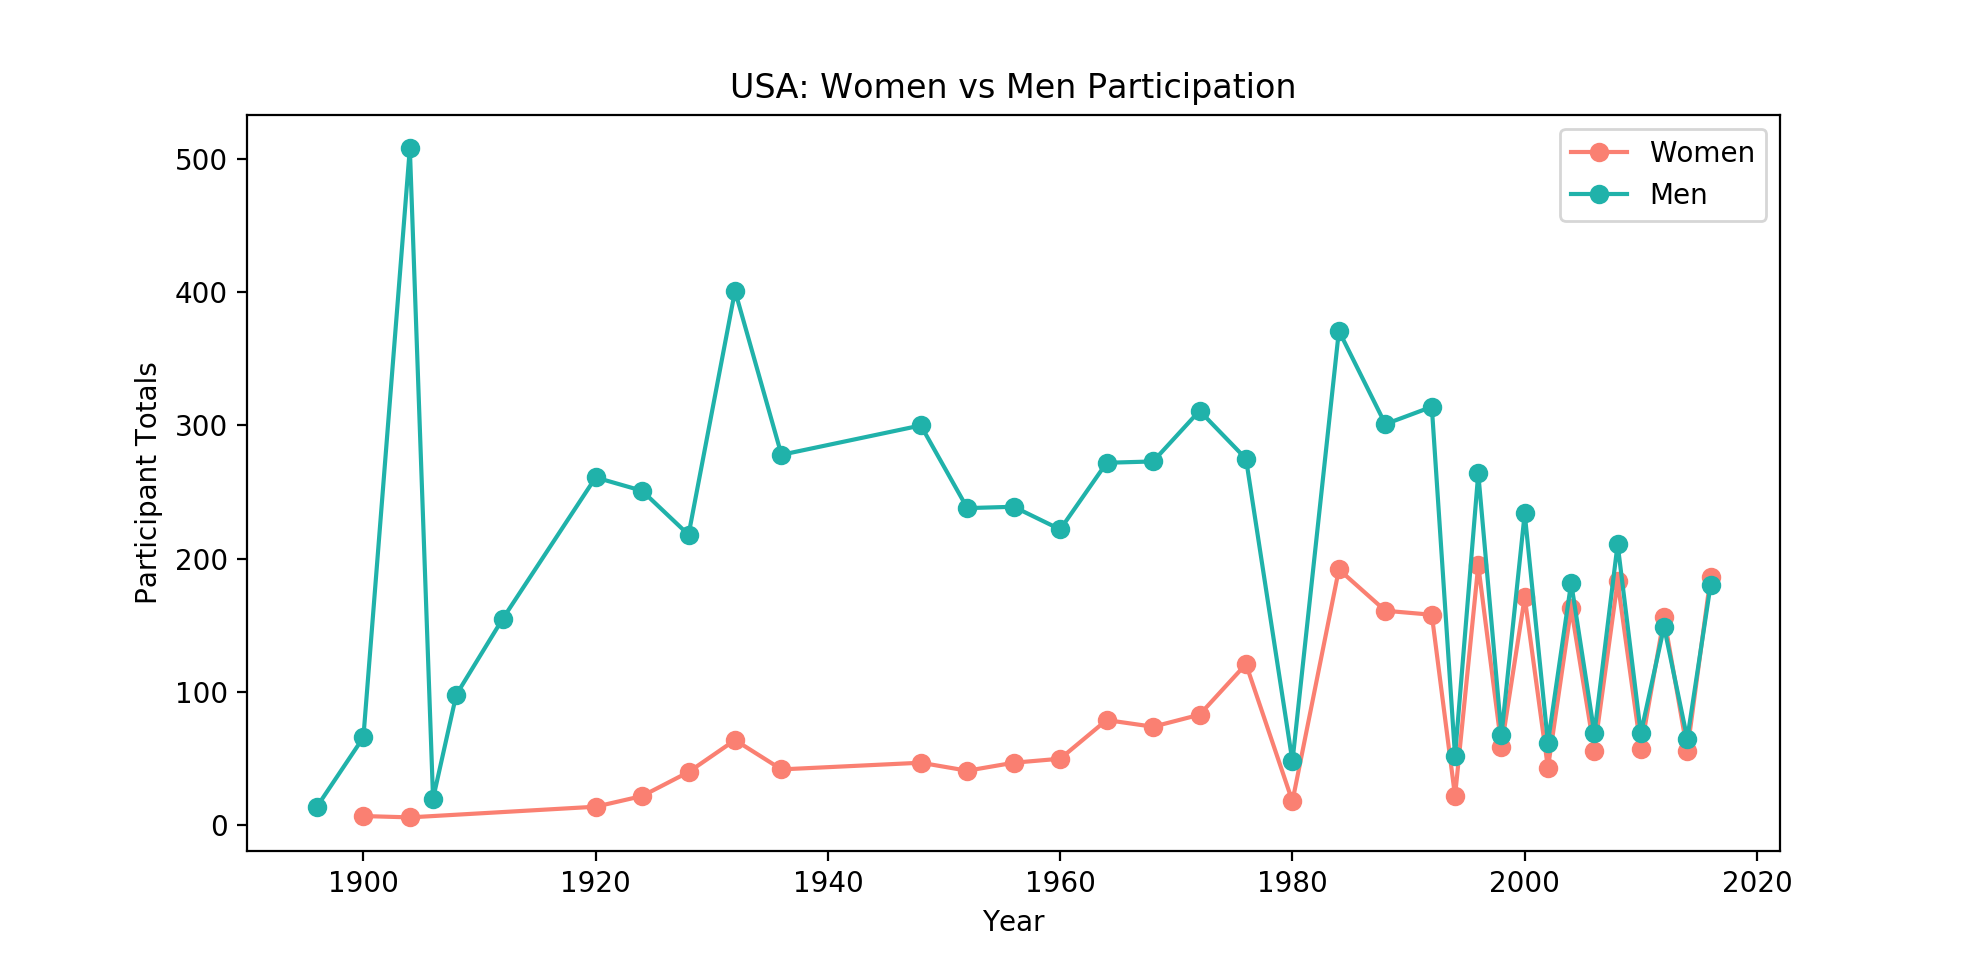

In [14]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#assuming I can choose any mouse, picking m601

women_xaxis = final_women_counts["Year"]
women_yaxis = final_women_counts["Sex"]

men_xaxis = final_men_counts["Year"]
men_yaxis = final_men_counts["Sex"]

women_line = plt.plot(women_xaxis, women_yaxis, marker ='o', color='salmon', label="Women")
men_line = plt.plot(men_xaxis, men_yaxis, marker ='o', color='lightseagreen', label="Men")
#plt.xticks(men_xaxis, men_xaxis, rotation ='vertical')
plt.title("USA: Women vs Men Participation")
plt.xlabel("Year")
plt.ylabel("Participant Totals")
plt.legend(loc="upper right")

